## Overfitting and underfitting 
- IMDB Dataset
- Overfitting 
    + baseline model
    + smaller model 
    + bigger model 
    + plot the trainig and validation loss
- Strategies
    + weight regularization 
    + dropout   

### Overfitting 
- Intuitively, a model with more parameters will have more **memorization capacity** 그래서 training set을 퍼펙하게 외워버림. 일반화시키는게 아니라. 이러면 unseen data인 test set에 대하여 모델이 아무 쓸모가 없음
- **Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting**
- If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

**Solution**
- more training data 
- regularization 
    + weight regularization 
    + dropout 

### Underfitting 
- model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

### Install packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


### Download the IMDB dataset 

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension)) #len(sequence)행, dimension열의 0행렬 
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # 각 단어마다 one-hot encoding 
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

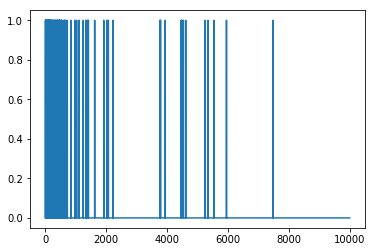

In [3]:
plt.plot(train_data[0]) #muliti-hot encoding 결과인데 0이 월등히 많으므로 plot이 아래와같이 나옴 

In [8]:
print(train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_data[0])

[0. 1. 1. ... 0. 0. 0.]


### Create a baseline model 

In [9]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), #16x10000 + 16x1
    keras.layers.Dense(16, activation=tf.nn.relu), #16x16 + 16x1
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #16x1 + 1
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.5023 - acc: 0.7966 - binary_crossentropy: 0.5023 - val_loss: 0.3480 - val_acc: 0.8709 - val_binary_crossentropy: 0.3480
Epoch 2/20
 - 8s - loss: 0.2574 - acc: 0.9096 - binary_crossentropy: 0.2574 - val_loss: 0.2863 - val_acc: 0.8865 - val_binary_crossentropy: 0.2863
Epoch 3/20
 - 7s - loss: 0.1888 - acc: 0.9334 - binary_crossentropy: 0.1888 - val_loss: 0.2871 - val_acc: 0.8854 - val_binary_crossentropy: 0.2871
Epoch 4/20
 - 8s - loss: 0.1503 - acc: 0.9489 - binary_crossentropy: 0.1503 - val_loss: 0.3087 - val_acc: 0.8789 - val_binary_crossentropy: 0.3087
Epoch 5/20
 - 8s - loss: 0.1228 - acc: 0.9591 - binary_crossentropy: 0.1228 - val_loss: 0.3335 - val_acc: 0.8744 - val_binary_crossentropy: 0.3335
Epoch 6/20
 - 7s - loss: 0.0998 - acc: 0.9692 - binary_crossentropy: 0.0998 - val_loss: 0.3641 - val_acc: 0.8707 - val_binary_crossentropy: 0.3641
Epoch 7/20
 - 7s - loss: 0.0799 - acc: 0.9772 - binary_crossentropy:

### Create a smaller model 
- less hidden units 

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), # 4x10000 + 4x1
    keras.layers.Dense(4, activation=tf.nn.relu), # 4x4 + 4x1
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #4x1 + 1
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.6429 - acc: 0.6414 - binary_crossentropy: 0.6429 - val_loss: 0.5570 - val_acc: 0.7736 - val_binary_crossentropy: 0.5570
Epoch 2/20
 - 7s - loss: 0.4989 - acc: 0.8473 - binary_crossentropy: 0.4989 - val_loss: 0.4942 - val_acc: 0.8405 - val_binary_crossentropy: 0.4942
Epoch 3/20
 - 7s - loss: 0.4405 - acc: 0.8972 - binary_crossentropy: 0.4405 - val_loss: 0.4677 - val_acc: 0.8727 - val_binary_crossentropy: 0.4677
Epoch 4/20
 - 7s - loss: 0.4045 - acc: 0.9205 - binary_crossentropy: 0.4045 - val_loss: 0.4540 - val_acc: 0.8774 - val_binary_crossentropy: 0.4540
Epoch 5/20
 - 7s - loss: 0.3775 - acc: 0.9345 - binary_crossentropy: 0.3775 - val_loss: 0.4448 - val_acc: 0.8794 - val_binary_crossentropy: 0.4448
Epoch 6/20
 - 7s - loss: 0.3545 - acc: 0.9464 - binary_crossentropy: 0.3545 - val_loss: 0.4459 - val_acc: 0.8728 - val_binary_crossentropy: 0.4459
Epoch 7/20
 - 8s - loss: 0.3341 - acc: 0.9542 - binary_crossentropy: